In [1]:
from shapely.geometry import Point, LineString, Polygon
import folium

In [2]:
#point=Point(50.45, 3.95) #lat-long
point=Point(3.95, 50.45) #long-lat
point.xy

(array('d', [3.95]), array('d', [50.45]))

In [3]:
# The last two is the same
list(point.xy[0])[0]
[list(point.xy)[i][0] for i in range(len(point.xy))]
[point.xy[i].tolist()[0] for i in range(len(point.xy))]

[3.95, 50.45]

In [4]:
point.x

3.95

In [5]:
m=folium.Map(location=[50.4,3.9], tiles="openstreetmap", zoom_start=10) #lat-long
folium.Marker([point.y,point.x]).add_to(m)
m

In [6]:
import pyproj as proj
crs_wgs = proj.Proj(init='epsg:4326')
crs_lb72 = proj.Proj(init='epsg:31370') 
x,y=proj.transform(crs_wgs,crs_lb72,point.x, point.y, radians=False)
print(x)
print(y)

120260.72915196652
126656.02174534462


In [7]:
print(proj.transform(crs_lb72,crs_wgs,x,y, radians=False)) #check the reverse tranformation

(3.9499999959667607, 50.450000002584275)


In [8]:
x2,y2=proj.transform(crs_lb72,crs_wgs,x,y, radians=False)
point2=Point(y2, x2)
folium.Marker([point2.y,point2.x]).add_to(m)
m

# List of points

In [9]:
import pandas as pd
df = pd.DataFrame(
    {'Latitude': [51,52,53,34,23,12,0,90,34,5],
     'Longitude': [4,5,6,16,34,48,0,5,63,18]})

In [10]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))

In [11]:
df['Coordinates'].apply(Point)

0     POINT (4 51)
1     POINT (5 52)
2     POINT (6 53)
3    POINT (16 34)
4    POINT (34 23)
5    POINT (48 12)
6      POINT (0 0)
7     POINT (5 90)
8    POINT (63 34)
9     POINT (18 5)
Name: Coordinates, dtype: object

In [12]:
lat_max=df.Latitude.max()
lat_min=df.Latitude.min()
long_max=df.Longitude.max()
long_min=df.Longitude.min()

zoom=(lat_max-lat_min)-(long_max-long_min)

In [13]:
lat_mean=df['Latitude'].mean()
long_mean=df['Longitude'].mean()

In [14]:
newmap=folium.Map(location=[lat_mean,long_mean], tiles="openstreetmap") #lat-long

xx=[list(reversed(df.Coordinates[i])) for i in range(df.Coordinates.count())] # reverse lat-long
[folium.Marker(xx[e]).add_to(newmap) for e in range(len(xx))]

In [15]:
#mm=folium.Map(location=[lat_mean,long_mean], tiles="openstreetmap", zoom_start=2) #lat-long-
#[folium.Marker(xx[e]).add_to(newmap) for e in range(len(xx))]##



In [16]:
df
newmap.fit_bounds(xx)
newmap

# CLUSTERS


In [17]:
from folium.plugins import FastMarkerCluster, MarkerCluster

In [18]:
newmap2=folium.Map(location=[lat_mean,long_mean], tiles="openstreetmap") #lat-long

mc =FastMarkerCluster(xx).add_to(newmap2) # using FastMarkerCluster you can import the list at once
#mc =MarkerCluster().add_to(newmap2) # using MarkerCluster you can import the list point by point

In [19]:
# ? FastMarkerCluster #to see the help

In [20]:
#[folium.Marker(xx[e]).add_to(mc) for e in range(len(xx))] # using MarkerCluster you need to do it in a loop for each marker individualy

In [21]:
newmap2.fit_bounds(xx)
newmap2

In [22]:
def wgs_to_bellamb72(pointX,pointY):
    """
    :param pointX: The la
    :param pointY: The long
    """
    crs_wgs = proj.Proj(init='epsg:4326')
    crs_lb72 = proj.Proj(init='epsg:31370') 
    x,y=proj.transform(crs_wgs,crs_lb72,pointX, pointY, radians=False)
    return x,y

In [23]:
wgs_to_bellamb72(4,50.4)

(123784.11681886965, 121075.75551512837)

In [24]:
import timeit
lst= timeit.timeit(stmt="[1,2,3,4,5,6,7,8,9,0]",number=90)
tpl= timeit.timeit(stmt="(1,2,3,4,5,6,7,8,9,0)",number=90)
print (lst)
print(tpl)

2.5747998734004796e-05
3.2480020308867097e-06


In [25]:
class MyPoints:
    """Define the points. Also contains the method of conversion from wgs84 to bel-lamb72."""
    def __init__(self, lat, lon, z=None):
        self.lat=lat
        self.long=lon
        self.z=z
        
    def wgs_to_bellamb72(self):
        """
        Method of converting coordinates form wgs84 to belgian lambert 72
        :param pointX: The la
        :param pointY: The long
        """
        crs_wgs = proj.Proj(init='epsg:4326')
        crs_lb72 = proj.Proj(init='epsg:31370') 
        x,y=proj.transform(crs_wgs,crs_lb72,self.lat, self.long, radians=False)
        return x,y
   
    def ApplyPoint(self):
        pass

    def get_collar(self):
        self.collar=name
        

In [26]:
# Distance between two boreholes or electrodes?
point_dist=lambda p1,p2: np.sqrt((p2.lat-p1.lat)**2+(p2.long-p1.long)**2+(p2.z-p1.z)**2)
## It's a function, called like: point_dist(p1,p2)

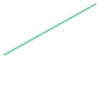

In [27]:
p1=MyPoints(50.084,4.1,0.21)

p2=MyPoints(50.12,4.12,-5.93)

Point(p1.lat,p1.long)

LineString([Point(p1.lat,p1.long),Point(p2.lat,p2.long)])


In [28]:
p1=MyPoints(4,50.4)

In [29]:
import numpy as np
from folium.plugins import FastMarkerCluster
class Points:
    """Define the points. Also contains the method of conversion from wgs84 to bel-lamb72."""
    def __init__(self, lat, lon):
        self.lat=np.array(lat)
        self.long=np.array(lon)
   
    def wgs_to_bellamb72(self):
        """Method of converting coordinates form wgs84 to belgian lambert 72.    
        :returns: X,Y        
        """
        crs_wgs = proj.Proj(init='epsg:4326')
        crs_lb72 = proj.Proj(init='epsg:31370') 
        x,y=proj.transform(crs_wgs,crs_lb72,self.lat, self.long, radians=False)
        return x,y

    def mean_of_Points(self):
        """Method of converting coordinates form wgs84 to belgian lambert 72.    
        :returns: Mean Lat and Mean Long        
        """
        Lat_mean=np.mean(self.lat)
        Long_mean=np.mean(self.long)
        return Lat_mean, Long_mean
    
    def clusterisation(self,map_name):
        mc =FastMarkerCluster([list(oi.lat),list(oi.long)]).add_to(map_name)

In [30]:
import folium
oi=Points([45,10],[20,25])
latm,lonm=oi.mean_of_Points()
newmap3=folium.Map(location=[latm,lonm], tiles="openstreetmap") #lat-long


In [31]:
oi.clusterisation(newmap3)


In [32]:
newmap3.fit_bounds(xx)

In [33]:
newmap3

In [34]:
import geopandas as gpd
import pandas as pd

In [35]:
brhs=pd.read_csv('brh.csv',delimiter="\t",header=None) #decimal=',' for changing the decimal point
brhs=pd.read_csv('brh.csv',delimiter="\t",header=None,decimal=',')

In [36]:
#del brhs[5],brhs[6] #run once
brhs

,0,1,2,3,4,5,6
0,F10,10,Sondes de chauffe & monitoring,152884.68,122577.91,1.00,1.28
1,F11,11,Sondes de chauffe & monitoring,152887.39,122576.63,3.71,0.00
2,F12,12,Sondes de chauffe & monitoring,152888.51,122578.98,4.82,2.35
3,F13,13,Sondes de chauffe & monitoring,152889.62,122581.32,5.93,4.70
4,F14,14,Sondes de chauffe & monitoring,152887.03,122581.11,3.34,4.49
5,F15,15,Sondes de chauffe & monitoring,152884.44,122580.90,0.75,4.28
6,F16,16,Sondes de chauffe & monitoring,152887.15,122579.62,3.46,2.99
7,F20,20,Monitoring,152886.41,122578.05,2.72,1.43
8,F21,21,Monitoring,152888.14,122578.19,4.45,1.57
9,F22,22,Monitoring,152888.38,122580.47,4.70,3.84


In [37]:
crs_wgs = proj.Proj(init='epsg:4326')
crs_lb72 = proj.Proj(init='epsg:31370') 
#x1,y1=proj.transform(crs_lb72,crs_wgs,float(brhs[4][0].replace(',','.')), float(brhs[3][0].replace(',','.')), radians=False)
#x2,y2=proj.transform(crs_lb72,crs_wgs,float(brhs[3][0].replace(',','.')), float(brhs[4][0].replace(',','.')), radians=False)
x2,y2=proj.transform(crs_lb72,crs_wgs,brhs[3][0],brhs[4][0])

In [38]:
pop=[proj.transform(crs_lb72,crs_wgs,brhs[3][i],brhs[4][i]) for i in range(len(brhs))]
pop=[pop[i][::-1] for i in range(len(pop))]
pop

[(50.414080653405016, 4.409333006301478),
 (50.41406913223102, 4.40937112558681),
 (50.41409025391428, 4.409386902218083),
 (50.414111285741996, 4.40940253808645),
 (50.414109410728315, 4.4093660954988465),
 (50.41410753570323, 4.409329652914125),
 (50.414096014530394, 4.40936777222187),
 (50.41408190340564, 4.409357348243474),
 (50.414083153401194, 4.4093816901867555),
 (50.4141036501625, 4.40938508480206),
 (50.41411713626402, 4.409383408161944),
 (50.414108785704556, 4.409353994869825),
 (50.414094764531946, 4.409343430272359),
 (50.414110035750824, 4.409378196128187),
 (50.414088378895684, 4.4093504596472535),
 (50.41411526124433, 4.409346965570604),
 (50.41407993912379, 4.409319076521122),
 (50.41407256425249, 4.4093269492281975)]

In [39]:
#np.sqrt((x1-x2)**2+(y1-y2)**2)
print(y2,x2)

50.414080653405016 4.409333006301478


In [40]:
m24=folium.Map(location=[50.414,4.409], tiles="openstreetmap", zoom_start=20, max_zoom=25) #lat-long
folium.LatLngPopup().add_to(m24)

In [41]:
"""


callback = ('''
function (row) {
    //var circle = L.circle(new L.LatLng(row[0], row[1]),{color:"red",radius:0.1});
    var marker = L.marker(new L.LatLng(row[0], row[1]))
    var popup = L.popup().setContent('<p>Hello world!</p>');
    marker.bindPopup(popup);
    return marker;
};
''')

"""






callback = (
'''
function (row) {
  // Get the checkbox
   // var checkBox = document.getElementById("myCheck");
    var marker = L.marker(new L.LatLng(row[0], row[1]))
    var popup = L.popup().setContent(string(row[0]));
    marker.bindPopup(popup);
    return marker;
    }
'''
)





In [42]:
folium._version.get_versions()

{'date': '2018-11-20T15:17:15-0200',
 'dirty': False,
 'error': None,
 'full-revisionid': '48aa49e90d67d23ea3bfad65e13e3426b7197825',
 'version': '0.7.0'}

In [44]:
mc =FastMarkerCluster(pop,callback=callback).add_to(m24)
#folium.Marker(pop,popup='P2').add_to(m24)
#folium.Marker([y1,x1],popup= 'P1').add_to(m24)
folium.LayerControl().add_to(m24)
m24

In [45]:
%matplotlib notebook


Total: 180 GB
Used: 60 GB
Free: 110 GB


<IPython.core.display.Javascript object>


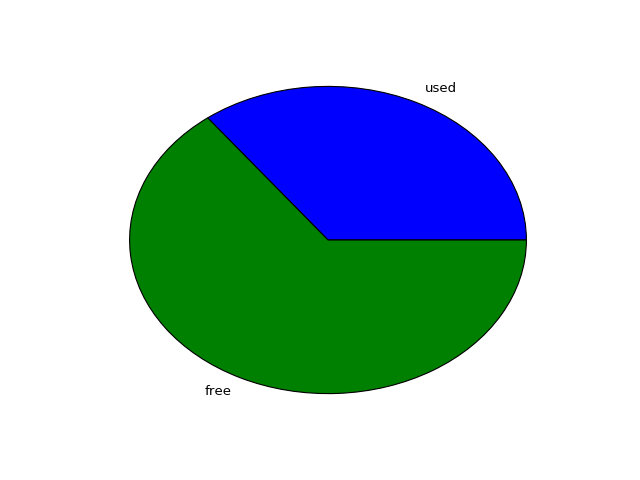

([<matplotlib.patches.Wedge at 0x7f75a18ccc88>,
  <matplotlib.text.Text at 0x7f75a18de128>])

In [46]:
import shutil
import os
import matplotlib.pyplot as plt

#os.statvfs("/home")
f = os.statvfs("/home")
#print ("preferred block size", "=>", f)
total, used, free = shutil.disk_usage("/")
print("Total: %d GB" % (total // (2**30)))
print("Used: %d GB" % (used // (2**30)))
print("Free: %d GB" % (free // (2**30)))

#total//2**30
plt.pie([ used, free],labels=["used","free"])